# THE SPARKS FOUNDATION GRIP SEPTEMBER 2021

# Task 5 : Exploratory Data Analysis - Sports


Perform ‘Exploratory Data Analysis(Advance Level)’ on dataset ‘Indian Premier League’

Dataset: Indian Premier League [Dataset_link](https://drive.google.com/file/d/18iDDIIZGt8eWxzqbyMIqcn5X7bHINuLw/view) 

# Importing all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Importing Matches dataset

In [2]:
df = pd.read_csv('matches.csv')

In [3]:
df.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
df.shape

(756, 18)

# Let's check names of all the columns(labels) present in the dataset

In [5]:
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

# Checking for null values in our data

In [6]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [7]:
df.info

<bound method DataFrame.info of         id  season           city        date                        team1  \
0        1    2017      Hyderabad  2017-04-05          Sunrisers Hyderabad   
1        2    2017           Pune  2017-04-06               Mumbai Indians   
2        3    2017         Rajkot  2017-04-07                Gujarat Lions   
3        4    2017         Indore  2017-04-08       Rising Pune Supergiant   
4        5    2017      Bangalore  2017-04-08  Royal Challengers Bangalore   
..     ...     ...            ...         ...                          ...   
751  11347    2019         Mumbai    05/05/19        Kolkata Knight Riders   
752  11412    2019        Chennai    07/05/19          Chennai Super Kings   
753  11413    2019  Visakhapatnam    08/05/19          Sunrisers Hyderabad   
754  11414    2019  Visakhapatnam    10/05/19               Delhi Capitals   
755  11415    2019      Hyderabad    12/05/19               Mumbai Indians   

                           team

In [8]:
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


Form above table we can conclude that no.of matches are 756 played. And we can say Average number of runs needed to win are 13.28.

# Let's see how many years of data we have.

In [9]:
df['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

From the above result we can say in this dataset we have data from 2008 - 2019

# The Season which consisted of highest number of matches played.


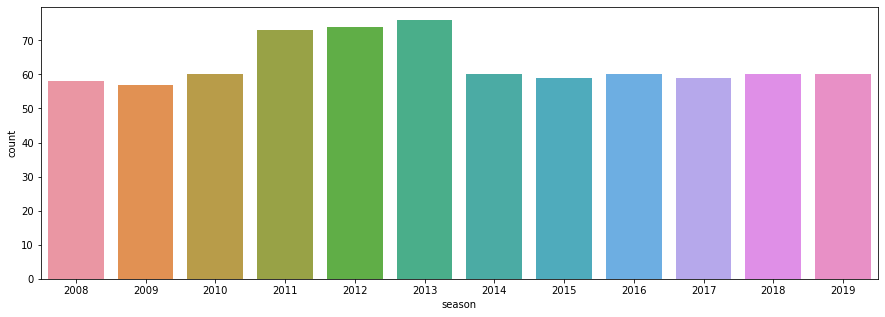

In [10]:
fig_size=(15,5)
fig,ax=plt.subplots(figsize=fig_size)
sns.countplot(x='season',data=df)
plt.show()

With this, we can say that the Season which consisted of the highest number of matches played in is 2013.

# Visualizing the most successful team according to the data.

<AxesSubplot:xlabel='winner'>

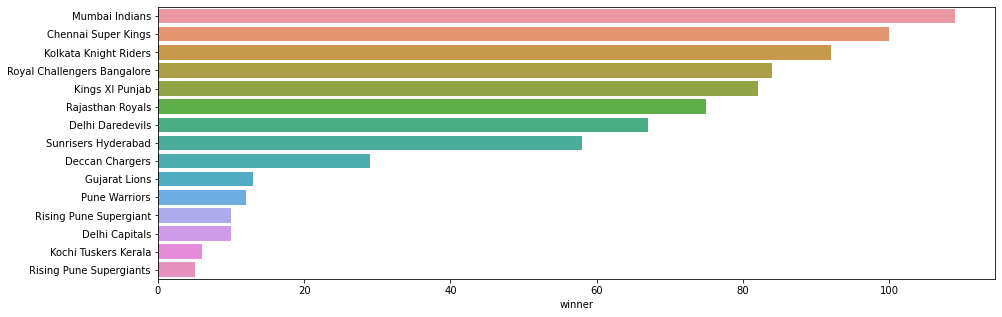

In [11]:
fig_size=(15,5)
fig,ax=plt.subplots(figsize=fig_size)
df1=df.winner.value_counts()
sns.barplot(x=df1, y=df1.index)

By looking at the graph we can find out that the most successful team is Mumbai Indians next Chennai Super Kings and so on...

# Let's check the probability of winning a match if the toss was won.

In [12]:
prob_of_win = df['toss_winner'] == df['winner']
prob_of_win.groupby(prob_of_win).size()

False    363
True     393
dtype: int64

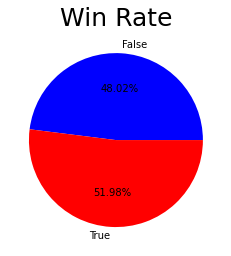

In [13]:
win_rate=prob_of_win.groupby(prob_of_win).size()
labels=['False','True']
plt.pie(win_rate, labels=labels, autopct= '%0.2f%%',colors = ["blue","red"])
plt.title('Win Rate',fontsize=25)
plt.show()

"Flase" in the sense that the team won the toss but lost the game. "True" in the sense that the team won the toss and won the game.

So from the pie chart, we can conclude that the toss won't matter a lot because there is only a slight advantage that the team will win if they actually won the toss.

# Highest wins by teams per Season

In [14]:
df.groupby('season')['winner'].value_counts()


season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [15]:
df['toss_decision'].value_counts()


field    463
bat      293
Name: toss_decision, dtype: int64

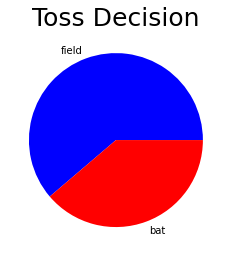

In [16]:
toss=df['toss_decision'].value_counts()
labels=['field','bat']
plt.pie(toss, labels=labels,colors = ["blue","red"])
plt.title('Toss Decision',fontsize=25)
plt.show()

From the pie chart above we can say that the teams who won the toss mostly chose to Field(bowling).

# Let's check who was the man of the match many times.

In [17]:
df['player_of_match'].value_counts()


CH Gayle          21
AB de Villiers    20
MS Dhoni          17
DA Warner         17
RG Sharma         17
                  ..
S Hetmyer          1
H Gurney           1
HH Gibbs           1
MD Mishra          1
S Nadeem           1
Name: player_of_match, Length: 226, dtype: int64

From the data above we can conclude 'CH Gayle' was the man of the match with 21 times titles and 'AB de Villiers' was the next with 20 times titled man of the match.

# Visualizing top 5 Cities where the most number of matches were played.


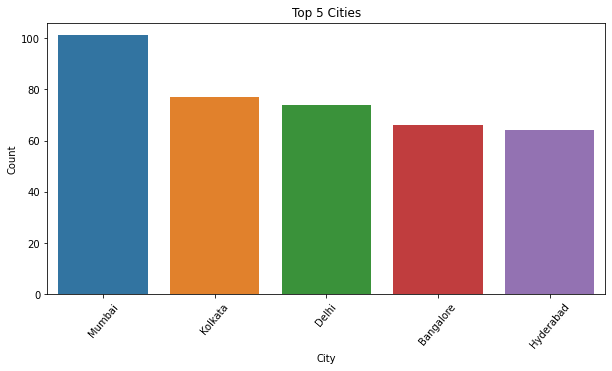

In [18]:
plt.subplots(figsize=(10,5))
sns.barplot(df['city'].value_counts()[:5].index,df['city'].value_counts()[:5].values)
plt.title('Top 5 Cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation = 50)
plt.show()

The most number of matches were played in Mumbai City.

# Visualizing top 5 Venue spots where the most number of matches were played.

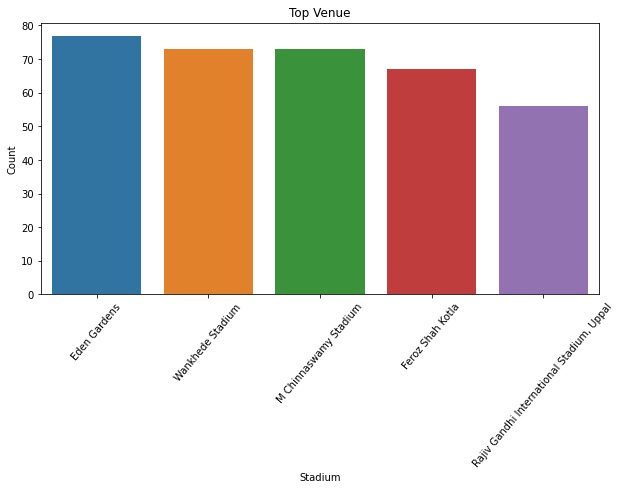

In [19]:
plt.subplots(figsize=(10,5))
sns.barplot(df['venue'].value_counts()[:5].index,df['venue'].value_counts()[:5].values)
plt.title('Top Venue')
plt.xlabel('Stadium')
plt.ylabel('Count')
plt.xticks(rotation = 50)
plt.show()

Eden Gardens was the Venue for most number of matches.

# The Team which won by scoring maximum runs.

In [20]:
df.iloc[df['win_by_runs'].idxmax()]


id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

# The team which won by consuming minimum runs


In [21]:
df.iloc[df['win_by_runs'].idxmin()]


id                                                       2
season                                                2017
city                                                  Pune
date                                            2017-04-06
team1                                       Mumbai Indians
team2                               Rising Pune Supergiant
toss_winner                         Rising Pune Supergiant
toss_decision                                        field
result                                              normal
dl_applied                                               0
winner                              Rising Pune Supergiant
win_by_runs                                              0
win_by_wickets                                           7
player_of_match                                  SPD Smith
venue              Maharashtra Cricket Association Stadium
umpire1                                     A Nand Kishore
umpire2                                             S Ra

# The team which won by consuming maximum wickets


In [22]:
df.iloc[df['win_by_wickets'].idxmax()]


id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

# The team which won by consuming minimum wickets


In [23]:
df.iloc[df['win_by_wickets'].idxmin()]


id                                                         1
season                                                  2017
city                                               Hyderabad
date                                              2017-04-05
team1                                    Sunrisers Hyderabad
team2                            Royal Challengers Bangalore
toss_winner                      Royal Challengers Bangalore
toss_decision                                          field
result                                                normal
dl_applied                                                 0
winner                                   Sunrisers Hyderabad
win_by_runs                                               35
win_by_wickets                                             0
player_of_match                                 Yuvraj Singh
venue              Rajiv Gandhi International Stadium, Uppal
umpire1                                          AY Dandekar
umpire2                 

# Importing Deliveries dataset


In [24]:
data = pd.read_csv('deliveries.csv')


In [25]:
data.head(5)


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [26]:
data.shape


(179078, 21)

# Let's check names of all the columns(labels) present in the dataset


In [27]:
data.columns


Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [28]:
data = data[['match_id','inning','batting_team','bowling_team','over','ball','batsman','non_striker','bowler','extra_runs','total_runs']]


In [29]:
data.head(5)


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,extra_runs,total_runs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,4
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,2,2


# Checking for null values in our data


In [30]:
data.isnull().sum()


match_id        0
inning          0
batting_team    0
bowling_team    0
over            0
ball            0
batsman         0
non_striker     0
bowler          0
extra_runs      0
total_runs      0
dtype: int64

In [31]:
data.info


<bound method DataFrame.info of         match_id  inning         batting_team                 bowling_team  \
0              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
1              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
2              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
3              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
4              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
...          ...     ...                  ...                          ...   
179073     11415       2  Chennai Super Kings               Mumbai Indians   
179074     11415       2  Chennai Super Kings               Mumbai Indians   
179075     11415       2  Chennai Super Kings               Mumbai Indians   
179076     11415       2  Chennai Super Kings               Mumbai Indians   
179077     11415       2  Chennai Super Kings               Mumbai Indians   

        over  ball    batsman n

In [32]:
data.describe()


,match_id,inning,over,ball,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,7.000000,10.000000


We can see that the total extra runs per match are 0.06 by which we can conclude that bowling_team is performing amazingly, without losing any extra runs.

# Finding the overs where most extra runs were lost.


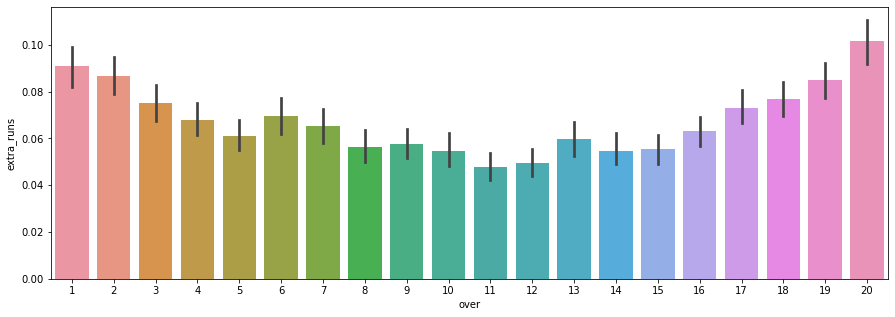

In [33]:
fig_size=(15,5)
fig,ax=plt.subplots(figsize=fig_size)
sns.barplot(x='over',y='extra_runs',data=data)
plt.show()

# The Team which gave maximum extra runs.


In [34]:
data.iloc[data['extra_runs'].idxmax()]


match_id                     473
inning                         2
batting_team    Delhi Daredevils
bowling_team      Mumbai Indians
over                           5
ball                           2
batsman                  M Vijay
non_striker            Q de Kock
bowler                SL Malinga
extra_runs                     7
total_runs                     7
Name: 112093, dtype: object

# The Team which gave minimum extra runs.


In [35]:
data.iloc[data['extra_runs'].idxmin()]


match_id                                  1
inning                                    1
batting_team            Sunrisers Hyderabad
bowling_team    Royal Challengers Bangalore
over                                      1
ball                                      1
batsman                           DA Warner
non_striker                        S Dhawan
bowler                             TS Mills
extra_runs                                0
total_runs                                0
Name: 0, dtype: object

# The Team which scored maximum runs in a over.


In [36]:
data.iloc[data['total_runs'].idxmax()]


match_id                               7896
inning                                    1
batting_team    Royal Challengers Bangalore
bowling_team          Kolkata Knight Riders
over                                      5
ball                                      1
batsman                         BB McCullum
non_striker                         V Kohli
bowler                        Kuldeep Yadav
extra_runs                                5
total_runs                               10
Name: 150968, dtype: object

# The Team which bolwed amazingly gave minimum runs in a over.


In [37]:
data.iloc[data['total_runs'].idxmin()]


match_id                                  1
inning                                    1
batting_team            Sunrisers Hyderabad
bowling_team    Royal Challengers Bangalore
over                                      1
ball                                      1
batsman                           DA Warner
non_striker                        S Dhawan
bowler                             TS Mills
extra_runs                                0
total_runs                                0
Name: 0, dtype: object

                                   ***Thank You***